## NHANES - Examination dataset

In [1]:
import numpy as np
import pandas as pd
import os

from pandas_profiling import ProfileReport


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
data_dir = "./datasets"

print(os.listdir("./datasets"))

['medications.csv', 'diet.csv', 'examination.csv', 'demographic.csv', 'labs.csv', 'questionnaire.csv']


In [3]:
#df_LABS = pd.read_csv(os.path.join(data_dir, 'labs.csv'))
#df_QUES = pd.read_csv(os.path.join(data_dir, 'questionnaire.csv'))
#df_DEMO = pd.read_csv(os.path.join(data_dir, 'demographic.csv'))                 
#df_DIET = pd.read_csv(os.path.join(data_dir, 'diet.csv'))
df_EXAM = pd.read_csv(os.path.join(data_dir, 'examination.csv'))

In [5]:
df_EXAM

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,1,611.0,NaN,NaN,1.0,3.0,60.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9809,83728,1,124.0,NaN,110.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9810,83729,1,679.0,NaN,NaN,1.0,4.0,80.0,1.0,1.0,...,1.0,1.0,1.0,3.0,4.0,55.0,1.0,NaN,NaN,3.0
9811,83730,1,381.0,NaN,72.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Handle with missing values

In [26]:
# if column has more than 60% empty values, drop it

df_EXAM2 = df_EXAM.dropna(thresh=df_EXAM.shape[0]*0.6, how='all',axis=1)

df_EXAM3 = df_EXAM2.dropna(inplace=False).reset_index (drop=True)

In [41]:
df_EXAM3

,SEQN,PEASCST1,PEASCTM1,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,...,OHX22CTC,OHX23CTC,OHX24CTC,OHX25CTC,OHX26CTC,OHX27CTC,OHX28CTC,OHX29CTC,OHX30CTC,OHX31CTC
0,73557,1,620.0,1.0,4.0,86.0,1.0,1.0,140.0,122.0,...,P,P,P,P,P,P,P,P,P,P
1,73558,1,766.0,1.0,4.0,74.0,1.0,1.0,170.0,156.0,...,S,S,S,S,S,S,Z,S,E,E
2,73559,1,665.0,1.0,4.0,68.0,1.0,1.0,160.0,140.0,...,S,Z,S,S,S,S,S,Z,Z,E
3,73560,1,803.0,1.0,2.0,64.0,1.0,1.0,130.0,108.0,...,D,S,S,S,S,U,D,D,S,U
4,73564,1,954.0,1.0,5.0,82.0,1.0,1.0,150.0,118.0,...,S,S,S,S,S,S,S,Z,Z,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5924,83721,1,629.0,1.0,4.0,64.0,1.0,1.0,140.0,108.0,...,S,S,S,S,S,S,S,R,Z,Z
5925,83724,1,1419.0,1.0,4.0,54.0,1.0,1.0,200.0,164.0,...,Z,S,S,S,S,S,Z,Z,R,E
5926,83727,1,611.0,1.0,3.0,60.0,1.0,1.0,140.0,110.0,...,S,S,S,S,S,S,M,S,Z,S
5927,83729,1,679.0,1.0,4.0,80.0,1.0,1.0,150.0,136.0,...,S,S,S,S,S,S,S,S,E,Z


Examination dataset: A complete variable dictionary can be found here: https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Examination&CycleBeginYear=2013

* <b>SEQN:</b>   Respondent sequence number.
* <b>PEASCCT1:</b>   Blood Pressure Comment
* <b>BPXCHR:</b>   60 sec HR (30 sec HR * 2)
* <b>OHX02CSC:</b>  Coronal Caries: Upper right 2nd molar (2M) surface calls. These values can be recorded as a string variable, for example:"0", "13", "468".

* Columns with constant values
    *  <b>BMDSTATS:</b>   Body Measures Component status Code
    *  <b>PEASCST1:</b>   Blood Pressure Status
    *  <b>MGDEXSTS:</b>   Grip test status

* <b>OHX32TC:</b>    Tooth Count: Lower right 3rd molar (3M)
* <b>OHX02CTC:</b>   Coronal Caries: Upper right 2nd molar (2M) tooth code
* <b>OHX03CTC:</b>   Coronal Caries: Upper right 1st molar (1M) tooth code
* <b>OHX04CTC:</b>   Coronal Caries: Upper right 2nd bicuspid/2nd primary molar (2B) tooth code
* <b>OHX05CTC:</b>   Coronal Caries: Upper right 1st bicuspid/1st primary molar (1B) tooth code
* <b>OHX06CTC:</b>   Coronal Caries: Upper right cuspid (C) tooth code
* <b>OHX07CTC:</b>   Coronal Caries: Upper right lateral incisor (LI) tooth code
* <b>OHX08CTC:</b>   Coronal Caries: Upper right central incisor (CI) tooth code
* <b>OHX09CTC:</b>   Coronal Caries: Upper left central incisor (CI) tooth code
* <b>OHX10CTC:</b>   Coronal Caries: Upper left lateral incisor (LI) tooth code
* <b>OHX11CTC:</b>   Coronal Caries: Upper left cuspid (C) tooth code
* <b>OHX12CTC:</b>   Coronal Caries: Upper left 1st bicuspid/1st primary molar (1B) tooth code
* <b>OHX13CTC:</b>   Coronal Caries: Upper left 2nd bicuspid/2nd primary molar (2B) tooth code
* <b>OHX14CTC:</b>   Coronal Caries: Upper left 1st molar (1M) tooth code
* <b>OHX15CTC:</b>   Coronal Caries: Upper left 2nd molar (2M) tooth code
* <b>OHX16TC:</b>    Tooth Count: Upper left 3rd molar (3M)
* <b>OHX17TC:</b>    Tooth Count: Lower left 3rd molar (3M)
* <b>OHX02CTC:</b>    Coronal Caries: Upper right 2nd molar (2M) tooth code
* <b>OHX03CTC:</b>    Coronal Caries: Upper right 1st molar (1M) tooth code


* <b>BPXDI1:</b>   Diastolic: Blood pressure (first reading) mm Hg (26.9% missing)
* <b>BPXDI2:</b>   Diastolic: Blood pressure (second reading) mm Hg
* <b>BPXSY1:</b>   Systolic: Blood pressure (first reading) mm Hg
* <b>BPXSY2:</b>   Systolic: Blood pressure (second reading) mm Hg
* <b>BPAARM:</b>   Arm selected:
* <b>BPACSZ:</b>   Cuff size (cm) (width X length)
* <b>BPXPLS:</b>   60 sec. pulse (30 sec. pulse * 2)
* <b>BPXPTY:</b>   Pulse type
* <b>BPXML1:</b>   MIL: maximum inflation levels (mm Hg)
* <b>BPAEN1:</b>   Enhancement used first reading

In [47]:
# Drop unwanted columns
# 'PEASCCT1', 'BPXCHR', 'OHX02CSC', 'OHX16CTC', 'OHX17CTC'
unwanted_columns = ['OHX32TC', 'OHX02CTC', 'OHX03CTC', 'OHX04CTC', 'OHX05CTC',
                    'OHX06CTC', 'OHX07CTC', 'OHX08CTC', 'OHX09CTC', 'OHX10CTC', 'OHX11CTC', 'OHX12CTC', 
                    'OHX13CTC', 'OHX14CTC', 'OHX15CTC', 'OHX16TC', 'OHX17TC', 'OHX18TC', 'OHX19TC', 'OHX20TC',
                    'OHX21TC', 'OHX22TC', 'OHX23TC', 'OHX24TC', 'OHX25TC', 'OHX26TC', 'OHX27TC', 'OHX28TC',
                    'OHX29TC', 'OHX30TC', 'OHX31TC', 'OHX32TC', 'OHX02CTC', 'OHX03CTC', 'OHX04CTC', 'OHX05CTC',
                    'OHX06CTC', 'OHX07CTC', 'OHX08CTC', 'OHX09CTC', 'OHX10CTC', 'OHX11CTC', 'OHX12CTC', 
                    'OHX13CTC', 'OHX14CTC', 'OHX15CTC', 'OHX18CTC', 'OHX19CTC', 
                    'OHX20CTC', 'OHX21CTC', 'OHX22CTC', 'OHX23CTC', 'OHX24CTC', 'OHX25CTC', 'OHX26CTC',
                    'OHX27CTC', 'OHX28CTC', 'OHX29CTC', 'OHX30CTC', 'OHX31CTC', 'OHX01TC', 'OHX02TC',
                    'OHX03TC', 'OHX04TC', 'OHX05TC', 'OHX06TC', 'OHX07TC', 'OHX08TC', 'OHX09TC',
                    'OHX10TC', 'OHX11TC', 'OHX12TC', 'OHX13TC', 'OHX14TC', 'OHX15TC', 'BMDSTATS', 'PEASCST1',
                    'MGDEXSTS', 'SEQN']

df_EXAM4 = df_EXAM3.drop(unwanted_columns, axis=1)

df_EXAM4 = df_EXAM4[df_EXAM4.BPXDI1 != 0] # remove rows with value zero
df_EXAM4 = df_EXAM4[df_EXAM4.BPXDI2 != 0]
df_EXAM4 = df_EXAM4[df_EXAM4.BPXDI3 != 0]

In [48]:
df_EXAM4

,PEASCTM1,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,...,MGXH1T2E,MGXH2T2,MGXH2T2E,MGXH1T3,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,OHDEXSTS,OHDDESTS
0,620.0,1.0,4.0,86.0,1.0,1.0,140.0,122.0,72.0,2.0,...,1.0,32.4,1.0,21.8,1.0,33.4,1.0,55.2,1.0,1.0
1,766.0,1.0,4.0,74.0,1.0,1.0,170.0,156.0,62.0,2.0,...,1.0,29.0,1.0,30.1,1.0,22.5,1.0,61.5,1.0,1.0
2,665.0,1.0,4.0,68.0,1.0,1.0,160.0,140.0,90.0,2.0,...,1.0,47.9,1.0,41.9,1.0,46.9,1.0,91.0,1.0,1.0
3,803.0,1.0,2.0,64.0,1.0,1.0,130.0,108.0,38.0,2.0,...,1.0,16.7,1.0,13.4,1.0,17.9,1.0,32.2,1.0,1.0
4,954.0,1.0,5.0,82.0,1.0,1.0,150.0,118.0,80.0,2.0,...,1.0,20.4,1.0,24.9,1.0,21.0,1.0,45.9,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5924,629.0,1.0,4.0,64.0,1.0,1.0,140.0,108.0,70.0,2.0,...,1.0,36.3,1.0,38.5,1.0,47.9,1.0,89.5,1.0,1.0
5925,1419.0,1.0,4.0,54.0,1.0,1.0,200.0,164.0,70.0,2.0,...,1.0,42.8,1.0,40.0,1.0,41.8,1.0,82.8,1.0,1.0
5926,611.0,1.0,3.0,60.0,1.0,1.0,140.0,110.0,68.0,2.0,...,1.0,35.4,1.0,32.9,1.0,37.2,1.0,70.1,1.0,1.0
5927,679.0,1.0,4.0,80.0,1.0,1.0,150.0,136.0,82.0,2.0,...,1.0,20.1,1.0,25.0,1.0,20.0,1.0,46.6,1.0,1.0


In [51]:
profile = ProfileReport(df_EXAM4, title="Pandas Profiling Report")

In [52]:
profile.to_widgets()

Generate report structure: 100%|██████████| 1/1 [00:07<00:00,  7.68s/it]


In [53]:
ss=StandardScaler()
ss.fit(df_EXAM4)
scaled_df=ss.transform(df_EXAM4)

_______

In [54]:
scaled_df

array([[-0.8844188 , -0.07008152,  0.41897337, ..., -0.50154386,
        -0.19603614, -0.01321291],
       [ 0.02329643, -0.07008152,  0.41897337, ..., -0.23481287,
        -0.19603614, -0.01321291],
       [-0.60464356, -0.07008152,  0.41897337, ...,  1.01416559,
        -0.19603614, -0.01321291],
       ...,
       [-0.94037385, -0.07008152, -0.87150967, ...,  0.1292961 ,
        -0.19603614, -0.01321291],
       [-0.51760237, -0.07008152,  0.41897337, ..., -0.86565284,
        -0.19603614, -0.01321291],
       [-1.64292057, -0.07008152, -0.87150967, ..., -1.31443832,
        -0.19603614, -0.01321291]])

In [55]:
pca=PCA()
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [56]:
pca.explained_variance_ratio_

array([2.82130126e-01, 1.04737141e-01, 6.74283348e-02, 4.72571256e-02,
       4.33115579e-02, 3.59062362e-02, 3.39203964e-02, 3.13509856e-02,
       2.41873687e-02, 2.30084912e-02, 2.26594106e-02, 2.18426927e-02,
       2.14285152e-02, 2.12741523e-02, 2.02669345e-02, 1.94530741e-02,
       1.92503026e-02, 1.84969608e-02, 1.75193060e-02, 1.71142862e-02,
       1.70013751e-02, 1.62424389e-02, 1.48225249e-02, 9.24901399e-03,
       8.96448026e-03, 7.79653424e-03, 6.49470552e-03, 4.18887003e-03,
       3.04595051e-03, 2.90008828e-03, 2.87754068e-03, 2.59381732e-03,
       2.32635807e-03, 1.95352046e-03, 1.29059805e-03, 1.09333916e-03,
       1.05602934e-03, 9.07646366e-04, 7.47963884e-04, 6.40084088e-04,
       5.06693872e-04, 4.39187147e-04, 1.96379345e-04, 8.04193656e-05,
       3.47288248e-05, 6.31348817e-06, 2.26191023e-33])

Text(0, 0.5, 'Variance%')

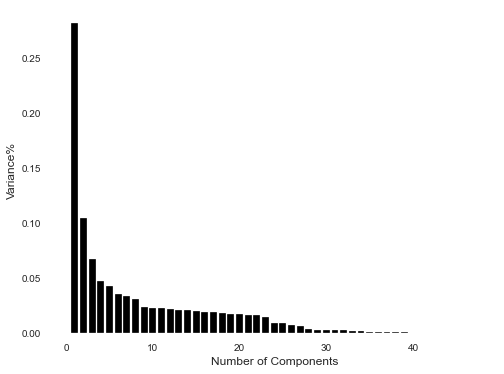

In [58]:
plt.figure(figsize=(8,6))
plt.bar(x=list(range(1,48)), height=pca.explained_variance_ratio_,color='black')
plt.xlabel('Number of Components',fontsize=12)
plt.ylabel('Variance%',fontsize=12)

In [59]:
pca=PCA(n_components=3)
pca.fit(df_EXAM4)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [60]:
X_pca=pca.transform(scaled_df)

In [61]:
X_pca

array([[-784.33299427, -249.76728703, -122.34123253],
       [-783.16490658, -247.13173003, -119.41989432],
       [-783.72023296, -244.83399944, -121.87838458],
       ...,
       [-784.38497001, -249.26510646, -123.39111526],
       [-783.82324448, -248.80823262, -119.68725189],
       [-785.42994323, -254.38356015, -123.26980592]])

Text(0, 0.5, 'Second Principal Component')

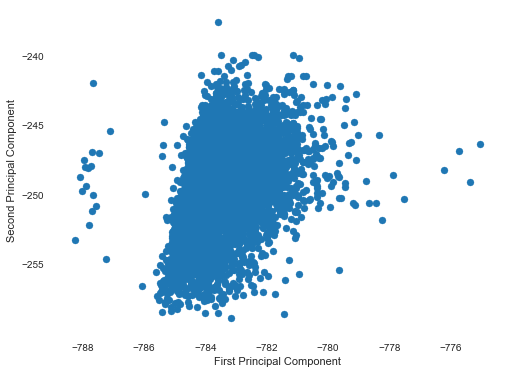

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(x=X_pca[:,0], y=X_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [63]:
X=X_pca
inertia=[]
for n in range (1,11):
    model=KMeans( n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
    model.fit(X)
    inertia.append(model.inertia_)
print(inertia)

[86565.34344744535, 48771.63468288039, 35889.599240874144, 27940.515450960578, 23768.03796573926, 21117.740109789967, 18972.142021366028, 17438.13861535646, 16131.41186597948, 15199.32813166405]


Text(0, 0.5, 'Inertia')

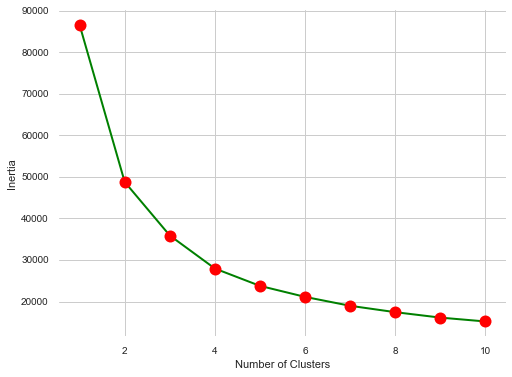

In [64]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
plt.plot(list(range(1,11)), inertia, linewidth=2, markersize=12, color='green', marker='o',markerfacecolor='r', markeredgecolor='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [77]:
model=KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
model.fit(X)
labels=model.labels_
centers=model.cluster_centers_


In [78]:
centers

array([[-783.21890921, -246.70707589, -124.380516  ],
       [-783.90389572, -252.42121196, -123.22849567],
       [-782.98732573, -248.24496675, -120.56490563]])

Text(0, 0.5, 'Second Principal Component')

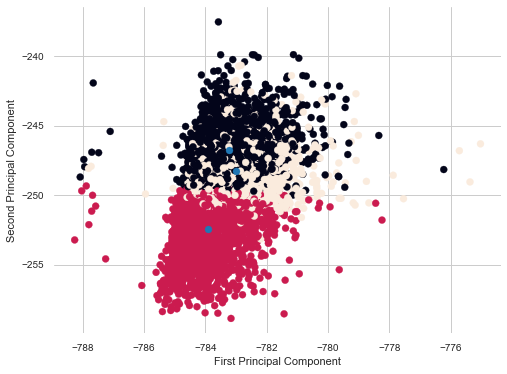

In [79]:
plt.figure(figsize=(8,6))
plt.scatter(x=X_pca[:,0], y=X_pca[:,1],c=labels)
plt.scatter(x=centers[:,0], y=centers[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [32]:
df_DEMO['RIDSTATR'].value_counts()

2    9813
1     362
Name: RIDSTATR, dtype: int64